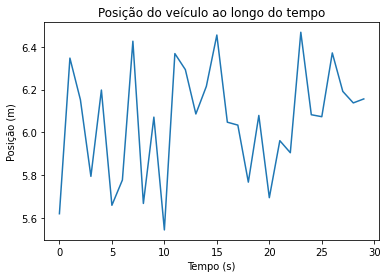

In [2]:
#1 a Crie um vetor de valores correspondentes à medição da posição do veículo por um
# sensor de posição ao longo de 30 segundos (período de amostragem de 1s),
# considerando ruído uniformemente distribuído.

# array de 30 segundos
import numpy as np
import matplotlib.pyplot as plt
import random

# vetor de posição
x = np.zeros(30)

# ruído
for i in range(0,30):
    #ruido 
    x[i] = random.uniform(5.5, 6.5)

# plot
plt.plot(x)
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Posição do veículo ao longo do tempo')
plt.show()


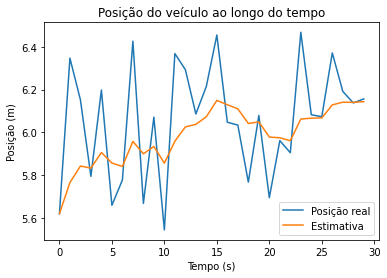

In [3]:
# 1 b) Considerando um filtro α, dado por x(n+1) = x(n) a(z(n+1) − x(n)  e uma posição
#(estado) inicial do veículo  x(0) , proceda à estimação do valor da posição do veículo,
# x(n) , para n = 1..30, considerando diferentes valores para o parâmetro a.
#Simule o processo de estimação recursiva, evidenciando os passos do processo e os
#valores calculados em cada iteração

# kalman filter
# x(n+1) = x(n) + a(z(n+1) - x(n))
# z(n+1) = x(n+1) + w(n+1)
# w(n+1) = ruído

# vetor de estimativa
x_est = np.zeros(30)
x_est[0] = x[0] 

for i in range(1,30):
    x_est[i] = x_est[i-1] + 0.20*(x[i] - x_est[i-1])
    
# plot scatter
plt.plot(x, label='Posição real' )
plt.plot(x_est, label='Estimativa' )
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Posição do veículo ao longo do tempo')
plt.legend()
plt.show()


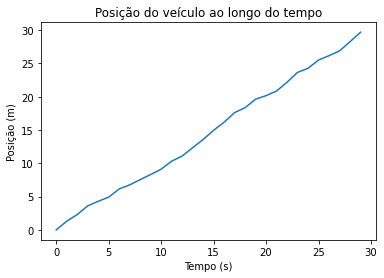

[ 0.          1.30089423  2.30017767  3.60753346  4.29332837  4.91614963
  6.14816247  6.75766024  7.54529014  8.31460891  9.11794217 10.31430868
 11.08519265 12.34117301 13.56683048 14.95507028 16.1689875  17.61090386
 18.34853854 19.62869549 20.15732911 20.85795679 22.16780365 23.65101462
 24.26496135 25.50538666 26.16197545 26.87563297 28.25764775 29.67604558]


In [24]:
# 2 No 2º cenário, considere o veículo a deslocar-se com movimento retilíneo uniforme
# (velocidade constante e diferente de 0).
# a. Crie um vetor de valores correspondentes à medição da posição do veículo por um
# sensor de posição ao longo de 30 segundos (período de amostragem de 1s),
# considerando ruído uniformemente distribuído e o movimento à velocidade constante,
# por exemplo, de 1m/s.

# vetor de posição
y = np.zeros(30)

y[0] = 0

#velocidade constante
v = 1

#dt
dt = 1

# velocidade 1m/s + ruido
for i in range(1,30):
    y[i] = y[i-1] + dt*v + random.uniform(-0.5, 0.5)
    
# plot
plt.plot(y)
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Posição do veículo ao longo do tempo')
plt.show()

print(y)

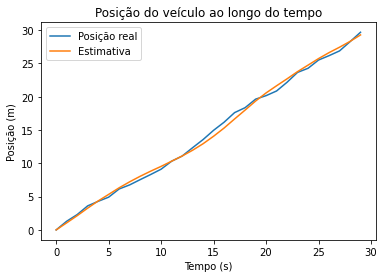

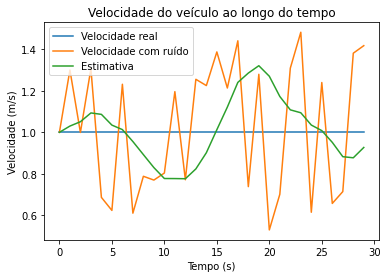

In [35]:
# b) Considerando um filtro α - β e a posição e velocidade (estados) iniciais do veículo ( x(0)
# e v0), proceda à estimação dos valores da posição e da velocidade do veículo, x(n) e v(n) ,
# para  = 1. .30, considerando diferentes valores para os parâmetros α e β.
# Simule o processo de estimação recursiva, evidenciando os passos do processo e os
# valores calculados em cada iteração.


# vetor de estimativa posição
y_est = np.zeros(30)
y_est[0] = y[0] 

# vetor de estimativa velocidade
v_est = np.zeros(30)
v_est[0] = v
v_ruido = np.zeros(30)
v_ruido[0] = v
v_real = np.zeros(30)
v_real[0] = v

alpha = 0.2
beta = 0.1

for i in range(1,30):
    
    y_aux = y_est[i-1] + v_est[i-1]*dt
    v_aux = v_est[i-1]
    
    v_ruido[i] = y[i]-y[i-1]   
    v_real[i] = 1
        
    y_est[i] = y_aux + alpha*(y[i] - y_aux)
    v_est[i] = v_aux + beta*((y[i] - y_aux)/dt)
  
    
# plot scatter
plt.plot(y, label='Posição real' )
plt.plot(y_est, label='Estimativa' )
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Posição do veículo ao longo do tempo')
plt.legend()
plt.show()

plt.plot(v_real, label='Velocidade real' )
plt.plot(v_ruido, label='Velocidade com ruído' )
plt.plot(v_est, label='Estimativa' )
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade do veículo ao longo do tempo')
plt.legend()
plt.show()

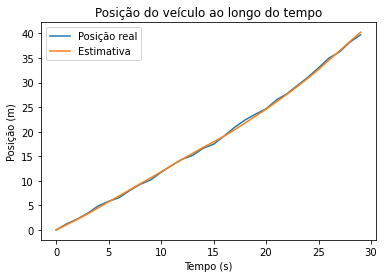

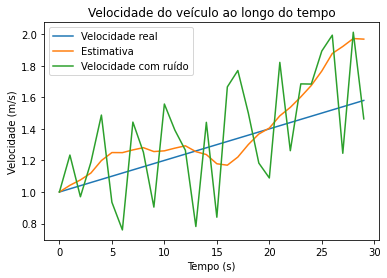

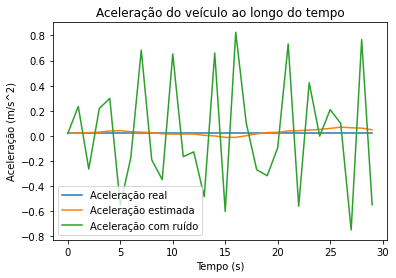

[1.   1.02 1.04 1.06 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26
 1.28 1.3  1.32 1.34 1.36 1.38 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54
 1.56 1.58]
[1.         1.04239817 1.07631796 1.12012579 1.19915609 1.24979079
 1.24932494 1.26653435 1.2808349  1.25612786 1.26070517 1.27769442
 1.2926346  1.25569767 1.23709773 1.17881603 1.16980223 1.22132193
 1.30062333 1.36732381 1.40483408 1.48252576 1.5361815  1.60262305
 1.67483986 1.76629036 1.87748119 1.92193901 1.97216271 1.96839763]
[ 0.          1.2339817   2.20383587  3.39221812  4.87949637  5.81454183
  6.57426682  8.0170496   9.26958035 10.17383757 11.73113667 13.12308122
 14.38767981 15.1689533  16.61025509 17.45046268 19.11607144 20.88559832
 22.38540092 23.56847604 24.65733676 26.47848708 27.74002431 29.42492626
 31.10863581 33.00170147 34.99525123 36.24040639 38.25245317 39.71570958]
[ 0.          1.05479634  2.12831464  3.25269677  4.4860996   5.72698916
  6.9130291   8.1466573   9.39653747 10.58746391 11.82776299 13.1010867

In [65]:
# vetor de aceleração 3
# nao tenho a certeza se esta bem

#vetor de posição
z = np.zeros(30)
z[0] = 0

# vetor de estimativa posição
z_est = np.zeros(30)
z_est[0] = z[0]

# velocidade 
v = 1
dt = 1

# vetor de estimativa velocidade
v_est = np.zeros(30)
v_est[0] = v
v_real = np.zeros(30)
v_real[0] = v
v_ruido = np.zeros(30)
v_ruido[0] = v

# aceleração
a = 0.02

# vetor de estimativa aceleração
a_est = np.zeros(30)
a_est[0] = a
a_real = np.zeros(30)
a_real[0] = a
a_ruido = np.zeros(30)
a_ruido[0] = a

alpha = 0.2
beta = 0.1
teta = 0.01

#velocidade mais aceleração mais ruido
for i in range(1,30):
    z[i] = z[i-1] + dt*v + 0.5*a/dt**2 + random.uniform(-0.5, 0.5)
    v = v + a*dt

for i in range(1, 30):
    z_aux = z_est[i-1] + v_est[i-1]*dt + 0.5*a_est[i-1]*dt**2
    v_aux = v_est[i-1] + a_est[i-1]*dt
    a_aux = a_est[i-1]
    
    v_ruido[i] = z[i]-z[i-1]
    a_ruido[i] = v_ruido[i]-v_ruido[i-1]
    
    v_real[i] = v_real[i-1] + a
    a_real[i] = a

    z_est[i] = z_aux + alpha*(z[i] - z_aux)
    v_est[i] = v_aux + beta*((z[i] - z_aux)/dt)
    a_est[i] = a_aux + teta*((z[i] - z_aux)/(dt**2)*2)
    

# plot scatter
plt.plot(z, label='Posição real')
plt.plot(z_est, label='Estimativa')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Posição do veículo ao longo do tempo')
plt.legend()
plt.show()

plt.plot(v_real, label='Velocidade real')
plt.plot(v_est, label='Estimativa')
plt.plot(v_ruido, label='Velocidade com ruído')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade do veículo ao longo do tempo')
plt.legend()
plt.show()

plt.plot(a_real, label='Aceleração real')
plt.plot(a_est, label='Aceleração estimada')
plt.plot(a_ruido, label='Aceleração com ruído')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s^2)')
plt.title('Aceleração do veículo ao longo do tempo')
plt.legend()
plt.show()



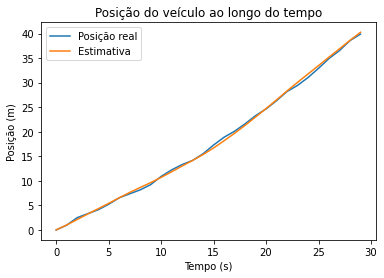

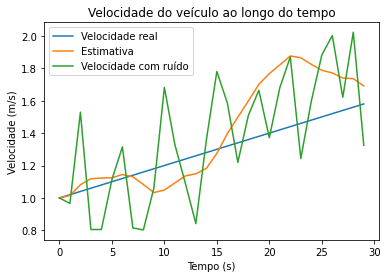

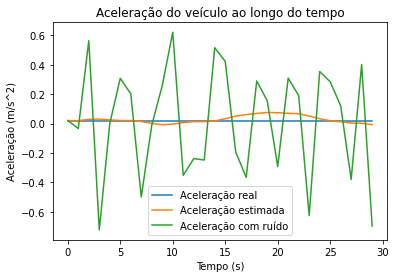

[1.   1.02 1.04 1.06 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26
 1.28 1.3  1.32 1.34 1.36 1.38 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54
 1.56 1.58]
[1.         1.01558608 1.08158405 1.11850639 1.12260954 1.12450177
 1.144419   1.13035334 1.08284993 1.03307967 1.04863287 1.09243858
 1.13573505 1.14896765 1.1824216  1.27480521 1.3966746  1.49829488
 1.59793097 1.70077863 1.76695379 1.82078199 1.87605679 1.86469417
 1.82400682 1.78741112 1.77133071 1.73962623 1.73602623 1.69117996]
[ 0.          0.96586082  2.49512441  3.30019877  4.10560289  5.2185852
  6.53351178  7.34823354  8.15090792  9.21169807 10.89352215 12.22264332
 13.31274061 14.15436759 15.51209639 17.29239824 18.87816641 20.09742095
 21.60609294 23.27027825 24.64192773 26.32210599 28.19209208 29.43509274
 31.03205768 32.91332675 34.91530782 36.53632341 38.55856438 39.8830241 ]
[ 0.          1.00117216  2.12007836  3.23276703  4.31421098  5.40315904
  6.53697084  7.62286383  8.63811428  9.61959787 10.69725435 11.83960901

In [67]:
# vetor de aceleração 4
# nao tenho a certeza se esta bem

#vetor de posição
z = np.zeros(30)
z[0] = 0

# vetor de estimativa posição
z_est = np.zeros(30)
z_est[0] = z[0]

# velocidade 
v = 1
dt = 1

# vetor de estimativa velocidade
v_est = np.zeros(30)
v_est[0] = v
v_real = np.zeros(30)
v_real[0] = v
v_ruido = np.zeros(30)
v_ruido[0] = v

# massa
m = 100

# força
f = 2

# aceleração
a = f/m

# vetor de estimativa aceleração
a_est = np.zeros(30)
a_est[0] = a
a_real = np.zeros(30)
a_real[0] = a
a_ruido = np.zeros(30)
a_ruido[0] = a

alpha = 0.2
beta = 0.1
teta = 0.01

#velocidade mais aceleração mais ruido
for i in range(1,30):
    z[i] = z[i-1] + dt*v + 0.5*a/dt**2 + random.uniform(-0.5, 0.5)
    v = v + a*dt

for i in range(1, 30):
    z_aux = z_est[i-1] + v_est[i-1]*dt + 0.5*a_est[i-1]*dt**2
    v_aux = v_est[i-1] + a_est[i-1]*dt
    a_aux = a_est[i-1]
    
    v_ruido[i] = z[i]-z[i-1]
    a_ruido[i] = v_ruido[i]-v_ruido[i-1]
    
    v_real[i] = v_real[i-1] + a
    a_real[i] = a

    z_est[i] = z_aux + alpha*(z[i] - z_aux)
    v_est[i] = v_aux + beta*((z[i] - z_aux)/dt)
    a_est[i] = a_aux + teta*((z[i] - z_aux)/(dt**2)*2)
    

# plot scatter
plt.plot(z, label='Posição real')
plt.plot(z_est, label='Estimativa')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Posição do veículo ao longo do tempo')
plt.legend()
plt.show()

plt.plot(v_real, label='Velocidade real')
plt.plot(v_est, label='Estimativa')
plt.plot(v_ruido, label='Velocidade com ruído')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade do veículo ao longo do tempo')
plt.legend()
plt.show()

plt.plot(a_real, label='Aceleração real')
plt.plot(a_est, label='Aceleração estimada')
plt.plot(a_ruido, label='Aceleração com ruído')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s^2)')
plt.title('Aceleração do veículo ao longo do tempo')
plt.legend()
plt.show()
